<a href="https://colab.research.google.com/github/ahmeddsoffar/CNN-rock-paper-scissors-vedio-recognition/blob/main/final_cnn_mode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 ##  resizeing of images
import os ## make use of os commands like mkdir..etc
import PIL ## show the image
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## read and prepair the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir="/content/drive/MyDrive/frames"

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/content/drive/MyDrive/frames')

In [ ]:
list(data_dir.glob('*/*.png'))[:5] ## random 5 png

[PosixPath('/content/drive/MyDrive/frames/paper/394.png'),
 PosixPath('/content/drive/MyDrive/frames/paper/192.png'),
 PosixPath('/content/drive/MyDrive/frames/paper/356.png'),
 PosixPath('/content/drive/MyDrive/frames/paper/179.png'),
 PosixPath('/content/drive/MyDrive/frames/paper/419.png')]

In [ ]:
image_count = len(list(data_dir.glob('*/*.png')))
print(f"{image_count} images")

2681 images


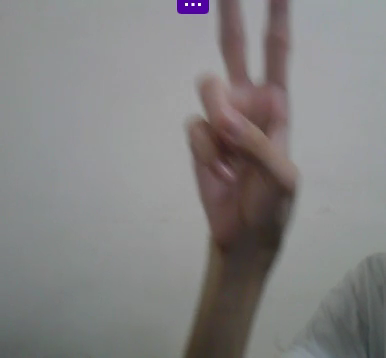

In [ ]:
scissors = list(data_dir.glob('scissors/*.png'))
PIL.Image.open(str(scissors[100]))

In [ ]:
rock_paper_scissors_dict = {
    'rock': list(data_dir.glob('rock/*.png')),
    'paper': list(data_dir.glob('paper/*.png')),
    'scissors': list(data_dir.glob('scissors/*.png')),
    'nothing':list(data_dir.glob('nothing/*.png')),
}

In [ ]:
rock_paper_scissors_label= {
    'rock':0,
    'paper':1,
    'scissors':2,
    'nothing':3,
}

In [ ]:
x,y=[],[]
for hand_name,images in rock_paper_scissors_dict.items(): ## loop for each folder
  for image in images: ## loop on each image in the folder
    img = cv2.imread(str(image))
    resized_img=cv2.resize(img,(200,200)) ## resizing of the images to a consitant size
    x.append(resized_img)
    y.append(rock_paper_scissors_label[hand_name]) ## assgining labels 0,1,2,3

In [ ]:
x = np.array(x)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=123) ## default spliting is 75% training 25% testing

In [ ]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

## data augmantation

In [ ]:
data_augmentation=keras.Sequential(
    [
        tf.keras.layers.RandomRotation(0.1),
        tf.keras.layers.RandomZoom(0.1),
    ]
)

## training the model

In [ ]:
num_classes=4

model=Sequential([
    data_augmentation,
    layers.Conv2D(16,3,padding='same',activation='relu',input_shape=(200, 200, 3)), ## 16 is the size of the filter
    layers.MaxPooling2D(),

    layers.Conv2D(32,3,padding='same',activation='relu'), ## 32 filter
    layers.MaxPooling2D(),

    layers.Conv2D(64,3,padding='same',activation='relu'),##  padding by putting zeros around the array of the imgages for the filter to take the corners  ## 64 filter
    layers.MaxPooling2D(),

    layers.Conv2D(256,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(512,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), ## used "adam" as it optmize the learning rate
               metrics=['accuracy']) ## the "loss" measures how well the model predictions match the true labels ## SparseCategoricalCrossentropy used for multiclass classifcation

model.fit(x_train_scaled,y_train,epochs=100)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - accuracy: 0.4229 - loss: 1.1699
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7037 - loss: 0.6294
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.7983 - loss: 0.5201
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8786 - loss: 0.3270
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9090 - loss: 0.2262
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9377 - loss: 0.1812
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.9655 - loss: 0.1014
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9382 - loss: 0.1528
Epoch 9/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9778 - loss: 0.0645
Epoch 10/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9606 - loss: 0.0911
Epoch 11/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9889 - loss: 0.0352
Epoch 12/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/ste

In [ ]:
model.save('FINAL.keras')

## evaluate the model

In [ ]:
model.evaluate(x_test_scaled,y_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 1.0000 - loss: 9.4494e-05


[0.00013773249520454556, 1.0]

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 200, 200, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 200, 200, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 100, 100, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 100, 100, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 50, 50, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 50, 50, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 25, 25, 256)         │         147,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,359,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,134,190 (42.47 MB)

 Trainable params: 3,711,396 (14.16 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,422,794 (28.32 MB)

In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test_scaled)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.array(y_test)
labels = list(rock_paper_scissors_label.keys())
print(classification_report(y_test, y_pred, target_names=labels))
## Precision The ratio of true positive predictions
## recall The ratio of true positive predictions to the sum of true positive and false negative predictions ## we need perscion only

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
              precision    recall  f1-score   support

        rock       1.00      1.00      1.00       134
       paper       1.00      1.00      1.00       242
    scissors       1.00      1.00      1.00       170
     nothing       1.00      1.00      1.00       125

    accuracy                           1.00       671
   macro avg       1.00      1.00      1.00       671
weighted avg       1.00      1.00      1.00       671



## creating the game (person vs bot)

In [ ]:
def game (predicted_label,bot_choice):
  if(predicted_label=="rock" and bot_choice=="scissors"):
    return "win"
  elif(predicted_label=="paper" and bot_choice=="rock"):
    return "win"
  elif(predicted_label=="scissors" and bot_choice=="paper"):
    return "win"
  elif(predicted_label==bot_choice):
    return "draw"
  else:
    return "lose"

## testing the model on real video


In [ ]:
class_labels = ['rock', 'paper', 'scissors','nothing']
previous_label = None
bot_choice = 'nothing'
result = ''

In [ ]:
video_path = '/content/drive/MyDrive/final_tesr_2.mp4'
output_path = '/content/drive/MyDrive/finaltestoutput22222222.avi'

cap = cv2.VideoCapture(video_path) ## vedio capture
fourcc = cv2.VideoWriter_fourcc(*'XVID') ## codec for the output video can be 'XVID' for Xvid or 'X264' for H.264 which is mp4
out = cv2.VideoWriter(output_path, fourcc, 20.0, (int(cap.get(3)), int(cap.get(4)))) # save the video

In [ ]:
while cap.isOpened():
    ret, frame = cap.read()
    if not ret: # If no frame is returned exit the loop
        break

    resized_frame = cv2.resize(frame, (200, 200))  # Resize the frame to the desired size
    normalized_frame = resized_frame / 255.0
    preprocessed_frame = np.expand_dims(normalized_frame, axis=0)

    predictions = model.predict(preprocessed_frame)
    predicted_class_index = np.argmax(predictions, axis=1)[0]  # index of the highest prediction
    predicted_label = class_labels[predicted_class_index] #  corresponding label from class_labels

    if predicted_label != previous_label and predicted_label != 'nothing':
        bot_choice = np.random.choice(class_labels[:-1])  # removing nothing from bot choices is bec of -1
        result = game(predicted_label, bot_choice)
        previous_label = predicted_label  # update previous label

    # Display prediction, bot choice, and result on the frame
    cv2.putText(frame, f'my choice: {predicted_label}', (10, 30), ## (10,30) top left cornar
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (11, 162, 20), 1) ## (0,255,0) color which is green  ## no. 1 size of pixels  ## 0.5 is font size

    if predicted_label != 'nothing':
        cv2.putText(frame, f'Bot choice: {bot_choice}', (10, 60),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (184, 8, 72 ),1)
        cv2.putText(frame, f'Result: {result}', (10, 90),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (53, 0, 176),1)

    out.write(frame) # Write the prediction and the bot choice and the reuslt on each frame

cap.release() ##release the video capture
out.release() ##release the write object which wrote on each frame


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━